In [6]:
from urllib.request import urlopen
import json

### Reading the Weather data

In [7]:
cities = ['KCLT', 'KCQT', 'KHOU', 'KIND', 'KJAX', 'KMDW', 'KNYC', 'KPHL', 'KPHX', 'KSEA']

In [8]:
airports = {}
for city in cities:
    airports.update({city: pd.read_csv(f"https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/{city}.csv")})

In [9]:
KCLT = airports['KCLT']
type(KCLT)

pandas.core.frame.DataFrame

In [10]:
KCLT.head(5)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [11]:
KCLT.shape

(365, 13)

In [12]:
KCLT.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [13]:
KCLT.dtypes

date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
dtype: object

### Reading the Airport Safety data

In [14]:
airline_safety = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv')

In [15]:
airline_safety.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [16]:
airline_safety.shape

(56, 8)

In [17]:
airline_safety.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

In [18]:
airline_safety.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [19]:
airline_safety.airline.drop_duplicates()

0                     Aer Lingus
1                      Aeroflot*
2          Aerolineas Argentinas
3                    Aeromexico*
4                     Air Canada
5                     Air France
6                     Air India*
7               Air New Zealand*
8               Alaska Airlines*
9                       Alitalia
10            All Nippon Airways
11                     American*
12             Austrian Airlines
13                       Avianca
14              British Airways*
15               Cathay Pacific*
16                China Airlines
17                        Condor
18                          COPA
19            Delta / Northwest*
20                      Egyptair
21                         El Al
22            Ethiopian Airlines
23                       Finnair
24              Garuda Indonesia
25                      Gulf Air
26             Hawaiian Airlines
27                        Iberia
28                Japan Airlines
29                 Kenya Airways
30        

#### Show which Airline has the most incidents

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20, 10))

In [21]:
x= airline_safety['airline']
y = airline_safety['incidents_00_14']

# Airline Safety on Bad Weather

## Data Engineering/Science Project

### Project Summary

This project aims to collect and analyse data from Airline Safety and Bad Weather datasets. 

The project follows 3 steps:

1. Scope the project and Gather Data
2. Explore and Access Data
3. Analyse Data

### Import all we need

In [22]:
import pandas as pd
import numpy as np

## Step 1: Scope the project and Gather Data




### Project Scope

In this project we will use two data sources to do the analyses: Airline Safety and Bad Weather.

This data will helps us answer the following questions:
- How many accidents have occurred when the weather has been bad?
- Do we have to fear traveling in flights during bad weather?

### Describe and Gather Data


Data Sources:

- Airline safety data can be found on this github repo: https://github.com/fivethirtyeight/data/tree/master/airline-safety
- Bad Weather can be found on this github repo: 


### Scraping the Data

### Reading the Weather data

In [23]:
airports = {}
for city in cities:
    airports.update({city: pd.read_csv(f"https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/{city}.csv")})

In [24]:
KCLT.head(5)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [25]:
KCLT.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

### Reading the Airport Safety data

In [26]:
airline_safety.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [27]:
airline_safety.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

In [28]:
airline_safety.airline.drop_duplicates()

0                     Aer Lingus
1                      Aeroflot*
2          Aerolineas Argentinas
3                    Aeromexico*
4                     Air Canada
5                     Air France
6                     Air India*
7               Air New Zealand*
8               Alaska Airlines*
9                       Alitalia
10            All Nippon Airways
11                     American*
12             Austrian Airlines
13                       Avianca
14              British Airways*
15               Cathay Pacific*
16                China Airlines
17                        Condor
18                          COPA
19            Delta / Northwest*
20                      Egyptair
21                         El Al
22            Ethiopian Airlines
23                       Finnair
24              Garuda Indonesia
25                      Gulf Air
26             Hawaiian Airlines
27                        Iberia
28                Japan Airlines
29                 Kenya Airways
30        

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20, 10))

In [33]:
airline_safety['airline']

0                     Aer Lingus
1                      Aeroflot*
2          Aerolineas Argentinas
3                    Aeromexico*
4                     Air Canada
5                     Air France
6                     Air India*
7               Air New Zealand*
8               Alaska Airlines*
9                       Alitalia
10            All Nippon Airways
11                     American*
12             Austrian Airlines
13                       Avianca
14              British Airways*
15               Cathay Pacific*
16                China Airlines
17                        Condor
18                          COPA
19            Delta / Northwest*
20                      Egyptair
21                         El Al
22            Ethiopian Airlines
23                       Finnair
24              Garuda Indonesia
25                      Gulf Air
26             Hawaiian Airlines
27                        Iberia
28                Japan Airlines
29                 Kenya Airways
30        

In [31]:
x = airline_safety['airline']
x = airline_safety['incidents_00_14']

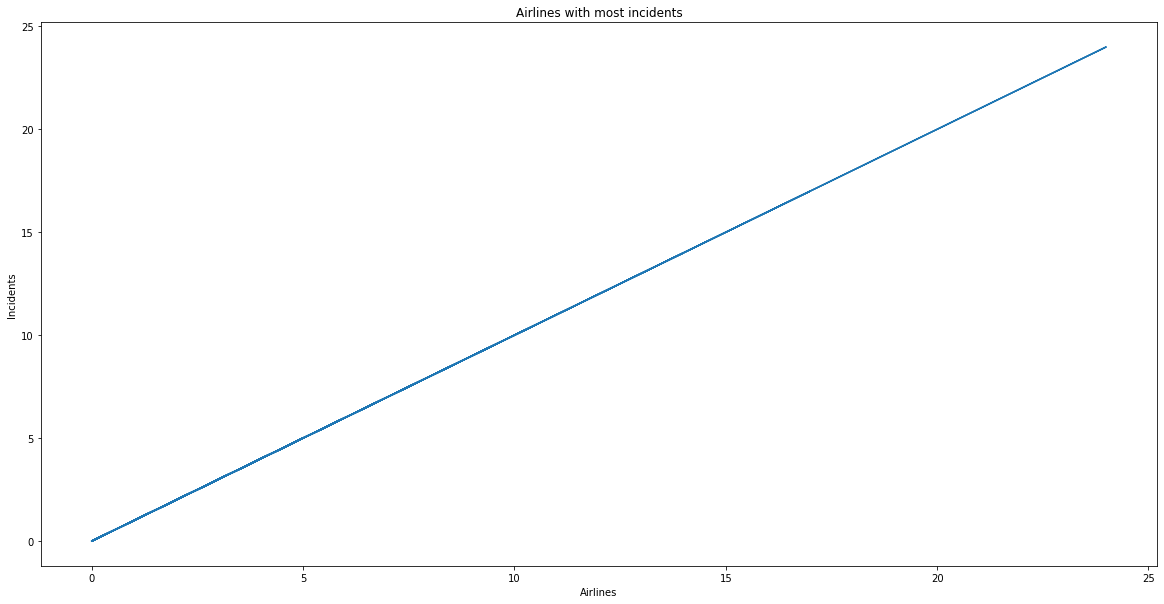

In [32]:
plt.plot(x, y)
plt.xlabel('Airlines')
plt.ylabel('Incidents')
plt.title('Airlines with most incidents')
plt.show()

In [30]:
airline_safety.sort_values('fatal_accidents_00_14',ascending=False)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
11,American*,5228357340,21,5,101,17,3,416
34,Malaysia Airlines,1039171244,3,1,34,3,2,537
35,Pakistan International,348563137,8,3,234,10,2,46
24,Garuda Indonesia,613356665,10,3,260,4,2,22
52,US Airways / America West*,2455687887,16,7,224,11,2,23
5,Air France,3004002661,14,4,79,6,2,337
22,Ethiopian Airlines,488560643,25,5,167,5,2,92
29,Kenya Airways,277414794,2,0,0,2,2,283
51,United / Continental*,7139291291,19,8,319,14,2,109
50,Turkish Airlines,1946098294,8,3,64,8,2,84
